<a href="https://colab.research.google.com/github/VarnitaJoshi/DeepLearning_Pytorch/blob/main/03_pyTorch_computer_vision_video_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##PyTorch Computer Vision

In [ ]:
import torch
from torch import nn
import torchvision  #baselibrary
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
print(torch.__version__)
print(torchvision.__version__)

2.0.0+cu118
0.15.1+cu118


##Getting a Dataset

In [ ]:
#Setup training data
from torchvision import datasets
train_data=datasets.FashionMNIST(
    root="data", # where to download data to?
     train=True, #do we want the training dataset?
      download=True, #do we want to download yes/no?
      transform=torchvision.transforms.ToTensor(),
      target_transform=None # how do we want to transform the labels/targets?
      )

test_data = datasets.FashionMNIST(root="data",
                                  train=False,
                                  download=True,
                                  transform=ToTensor(),
                                  target_transform=None)


100%|██████████| 26421880/26421880 [00:01<00:00, 17477138.15it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 307038.57it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5597499.76it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 15911773.76it/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
len(train_data), len(test_data)

(60000, 10000)

In [ ]:
image, label= train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [ ]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
class_to_idx =train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [ ]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [ ]:
print(f"Image shape: {image.shape} -> [color_channels, height, width]")
print(f"Image label: {class_names[label]}")

Image shape: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Image label: Ankle boot


#Visualising our data

Image Shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

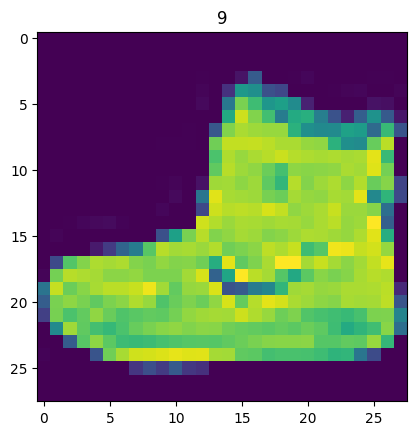

In [ ]:
import matplotlib.pyplot as plt
image, label=train_data[0]
print(f"Image Shape: {image.shape}")
plt.imshow(image.squeeze())
plt.title(label)


(-0.5, 27.5, 27.5, -0.5)

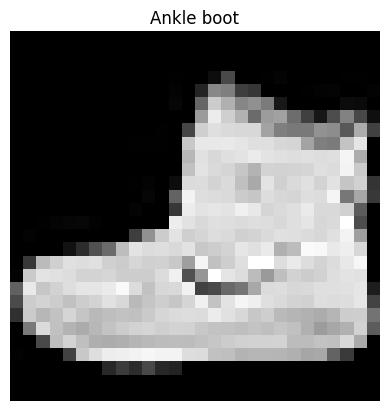

In [ ]:
plt.imshow(image.squeeze(),cmap="gray")
plt.title(class_names[label])
plt.axis(False)  # removes axis.

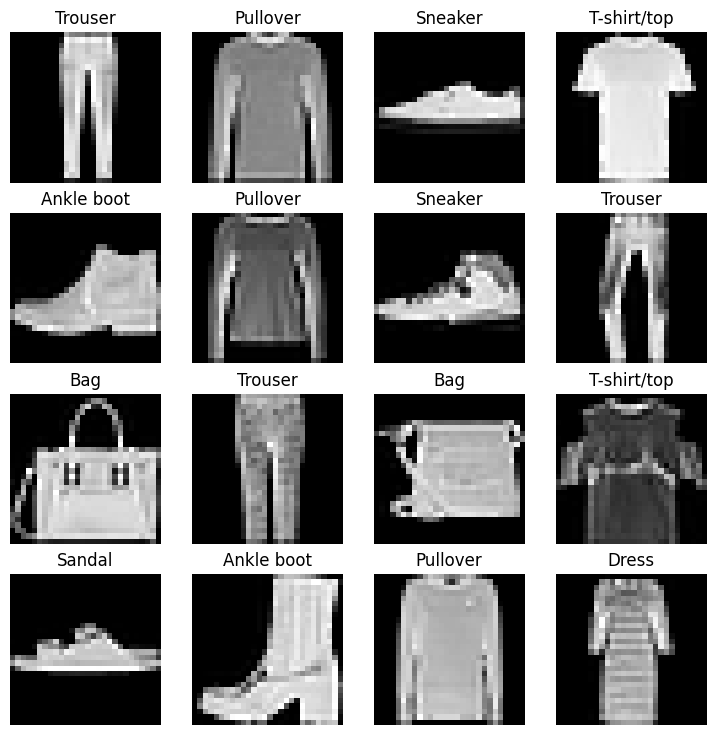

In [ ]:
# Plot more images
# torch.manual_seed(42)
fig=plt.figure(figsize=(9,9))
rows,cols=4,4
for i in range(1,rows*cols+1):
  random_idx=torch.randint(0,len(train_data),size=[1]).item()
  # print(random_idx);
  img,label=train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)

In [ ]:
train_data,test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

## Prepare dataloader
converts dataset into a Python iterable


In [ ]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(dataset=train_data,batch_size=BATCH_SIZE,shuffle=True)
test_dataloader= DataLoader(dataset=test_data,batch_size=BATCH_SIZE,shuffle=False)

train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f4f559a7160>,
 <torch.utils.data.dataloader.DataLoader at 0x7f4f55d63f70>)

In [ ]:
print(f"DataLoaders: {train_dataloader, test_dataloader}")
print(f"Length of train DataLoader: {len(train_dataloader)} batches of {BATCH_SIZE}....")
print(f"Length of test Dataloader: {len(test_dataloader)} batches of size: {BATCH_SIZE}...")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x7f4f559a7160>, <torch.utils.data.dataloader.DataLoader object at 0x7f4f55d63f70>)
Length of train DataLoader: 1875 batches of 32....
Length of test Dataloader: 313 batches of size: 32...


In [ ]:
train_features_batch, train_labels_batch=next(iter(train_dataloader)) # it will give next batch at every iteration

train_features_batch.shape, train_labels_batch.shape






(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 3, label size: torch.Size([])


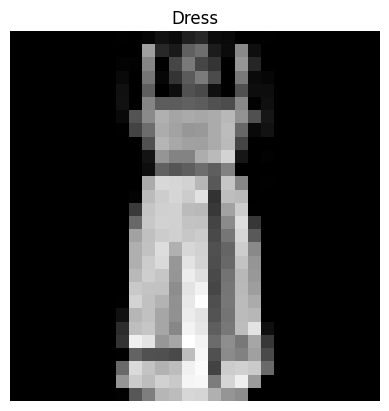

In [ ]:
random_idx=torch.randint(0,len(train_features_batch),size=[1]).item()
img, labels=train_features_batch[random_idx],train_labels_batch[random_idx]
plt.imshow(img.squeeze(),cmap="gray")
plt.title(class_names[labels])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label: {labels}, label size: {labels.shape}")


## Model 0: Build a baseline model

In [ ]:
# create flatten laer
flatten_model=nn.Flatten()

x=train_features_batch[0]
# x.shape

# flatten the sample.
output= flatten_model(x)  # perform forward pass

# print out all:

print(f"Shape before flattening: {x.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape}")


Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flattening: torch.Size([1, 784])


In [ ]:
output.squeeze() # one value per pixel in otput vector

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0039, 0.0000, 0.1333, 0.2039, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.2275, 0.4431, 0.0510, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0039, 0.0000, 0.0039, 0.0000, 0.1098, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0039, 0.0196, 0.0039, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0196, 0.0000, 0.0000, 0.1843, 0.1608,
        0.0000, 0.0000, 0.0118, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 

In [ ]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self,input_shape:int,hidden_units:int,output_shape:int):
      super().__init__()
      self.layer_stack = nn.Sequential(nn.Flatten(),nn.Linear(in_features=input_shape,out_features=hidden_units),nn.Linear(in_features=hidden_units,out_features=output_shape))
  def forward(self,x):
    return self.layer_stack(x)

In [ ]:
torch.manual_seed(42)

#model with input parameters
model_0= FashionMNISTModelV0(input_shape=784, # it is 28*28
                             hidden_units=10, # number of units in hidden layer
                             output_shape=len(class_names)).to("cpu") #one for every class
model_0                          

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
dummy_x= torch.rand([1,1,28,28])
model_0(dummy_x)


tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [ ]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

In [ ]:
### setup loss, optimizer and  evaluation metrics
def accuracy(y_true,y_preds):
   correct= torch.eq(y_true,y_preds).sum().item()
   acc=correct/len(y_preds) * 100
   return acc

In [ ]:
import requests
from pathlib import Path
if Path("helper_functionss.py").is_file():
  print("Already exist no need to download")
else:
  print("Downloading helper_funtionss.py")
  request= requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functionss.py","wb") as f:
    f.write(request.content)



In [ ]:
from helper_functionss import accuracy_fn

#setup loss fn and otptimizer
loss_fn= nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_0.parameters(),lr=0.1)


In [ ]:
## fxn to time our epxeriments
from timeit import default_timer as timer
def print_train_time(start:float, end:float, device: torch.device=None):
  total_time=end-start
  print(f"Train time on {device}: {total_time: .3f} seconds")
  return total_time




In [ ]:
start_time=timer()

end_time=timer()
print_train_time(start=start_time, end=end_time, device="cpu")

Train time on cpu:  0.000 seconds


5.7681999976466614e-05

In [ ]:
#test and train loop
from tqdm.auto import tqdm

torch.manual_seed(42)
train_time_start_on_cpu=timer()

epochs=3
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n--------")
  ###Training
  train_loss = 0
  #loop through the batch (X,y)--->(image,labels) features==x, labels==y
  for batch, (X,y) in enumerate(train_dataloader):
      #Loop will continue untill it will run through all batches of train_dataloader.
      #Training
      model_0.train()

      #Forward pass
      y_pred=model_0(X)

      #calculate loss(per batch)
      loss=loss_fn(y_pred,y)
      train_loss+=loss 

      # Optimizer zero grad
      optimizer.zero_grad()

      #loss backward
      loss.backward()

      #Optimizer step
      optimizer.step()

      if batch % 400 == 0:
        print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")


  train_loss/=len(train_dataloader)
       



  ###Testing loop, no need of tracking batches
  test_loss, test_acc=0,0
  model_0.eval()
  with torch.inference_mode():
    for X_test,y_test in test_dataloader:
      test_pred=model_0(X_test)

      test_loss+=loss_fn(test_pred,y_test)

      test_acc+=accuracy(y_true=y_test, y_preds=test_pred.argmax(dim=1))

    test_loss/=len(test_dataloader)

    test_acc/=len(test_dataloader)
  
print(f"\n Train loss: {train_loss: .4f} |test loss: {test_loss:.4f},Test acc:{test_acc:.4f}")

train_time_end_on_cpu = timer()
total_train_time_model_0=print_train_time(start=train_time_start_on_cpu,end=train_time_end_on_cpu,device=str(next(model_0.parameters())))



  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
--------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Epoch: 1
--------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Epoch: 2
--------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

 Train loss:  0.4550 |test loss: 0.4766,Test acc:83.4265
Train time on Parameter containing:
tensor([[ 0.0273,  0.0298, -0.0065,  ...,  0.0071,  0.0091,  0.0170],
        [-0.0189, -0.0355,  0.0155,  ...,  0.0161,  0.0120,  0.0117],
        [-0.0008,  0.0020,  0.0032,  ...,  0.0058, -0.0146,  0.0084],
        ...,
        [-0.0116,  0.0274, -0.0323,  ...,  0.0527,  0.0434,  0.0006],
        [-0.0231,  0.0252,  0.0236,  ..., -0.0892, -0.0385, -0.0071],
        [ 0.0175, -0.0148,  0.0027,  ..., -0.1155, 

In [ ]:
str(next(model_0.parameters()).device)

'cpu'

##Make predictions and get Model 0 results

In [ ]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,data_loader:torch.utils.data.DataLoader,loss_fn:torch.nn.Module,accuracy):
  loss, acc= 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
        y_pred=model(X)

        loss+=loss_fn(y_pred,y)
        acc+=accuracy(y_true=y,y_preds=y_pred.argmax(dim=1))

    loss /= len(data_loader)
    acc /=len(data_loader)


  return {"model_name ": model.__class__.__name__,
           "model_loss": loss.item(),
            "model_acc": acc}


# calculate model_0 results on test dataset.
model_0_results=eval_model(model=model_0,data_loader=test_dataloader,loss_fn=loss_fn,accuracy=accuracy)
model_0_results






  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name ': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

## Setup device agnostic-code(for using a gpu if there is one)

In [ ]:
!nvidia-smi

/bin/bash: nvidia-smi: command not found


In [ ]:
torch.cuda.is_available()

False

In [ ]:
# Setup device agnostic code.
import torch
device= "cuda" if torch.cuda.is_available() else "cpu"
device



'cpu'

# Model: Building a better model with non linearity


In [ ]:
# Model with non linear and linear layers
class FashionMnistmodelV1(nn.Module):
  def __init__(self,input_shape: int, hidden_units: int,output_shape: int):
    super().__init__()
    self.layer_Stack=nn.Sequential(nn.Flatten(),nn.Linear(in_features=input_shape,out_features=hidden_units),nn.ReLU(),nn.Linear(in_features=hidden_units,out_features=output_shape),nn.ReLU())

  def forward(self,x: torch.Tensor):
    return self.layer_Stack(x)


In [ ]:
next(model_0.parameters()).device

device(type='cpu')

In [ ]:
device

'cpu'

In [ ]:
#instance of model_1
torch.manual_seed(42)
model_1= FashionMnistmodelV1(input_shape=784, # this is the output of the flatten layer),
                             hidden_units=10, output_shape=len(class_names)).to(device)
next(model_1.parameters()).device

device(type='cpu')

In [ ]:
#loss func and optimizer
loss_fn=nn.CrossEntropyLoss() # measures how wrong our model is
optimizer=torch.optim.SGD(params=model_1.parameters(),lr=0.1) # updates the model parameters

## Functionizing training and evaluation/testing loops

In [ ]:
def train_step(model: torch.nn.Module, 
               data_loader: torch.utils.data.dataloader,
               loss_fn : torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device=device):
      train_loss,train_acc=0,0
      model.train()
      for batch, (X, y) in enumerate(data_loader):
        
        X,y=X.to(device),y.to(device)
        y_pred=model(X)

        loss=loss_fn(y_pred,y)
        train_loss+=loss
        train_acc+=accuracy_fn(y_true=y,y_preds=y_pred.argmax(dim=1))

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()
        
        
      train_loss/=len(data_loader)
      train_acc/=len(data_loader)
      print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f} %")
  
  

In [ ]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn:torch.nn.Module,
              accuracy_fn,device:torch.device=device):
  
  test_loss,test_acc=0,0
  model.eval()
  with torch.inference_mode():
      for X_test, y_test in data_loader:
          X_test,y_test=X_test.to(device),y_test.to(device)
          y_preds=model(X_test)
          t_loss=loss_fn(y_preds,y_test)
          test_loss+=t_loss
          test_acc+=accuracy_fn(y_true=y_test,y_preds=y_preds.argmax(dim=1))
      test_loss/=len(data_loader)
      test_acc/=len(data_loader)
      print(f"Test Loss: {test_loss:.5f} | Test_acc: {test_acc:.2f} %\n")



In [ ]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               accuracy,device=device):
  loss, acc= 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
        X, y = X.to(device),y.to(device)
        y_pred=model(X)

        loss+=loss_fn(y_pred,y)
        acc+=accuracy(y_true=y,y_preds=y_pred.argmax(dim=1))

    loss /= len(data_loader)
    acc /=len(data_loader)


  return {"model_name ": model.__class__.__name__,
           "model_loss": loss.item(),
            "model_acc": acc}

In [ ]:
torch.manual_seed(42)
from timeit import default_timer as timer
train_time_start_gpu=timer()
epochs=3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-------------")
    train_step(model=model_1,data_loader=train_dataloader,
               loss_fn=loss_fn,optimizer=optimizer,
               accuracy_fn=accuracy,device=device)
    test_step(model=model_1,
              data_loader=test_dataloader,
              loss_fn=loss_fn,accuracy_fn=accuracy,
              device=device)

train_time_end_gpu=timer()
total_train_time_model_1=print_train_time(start=train_time_start_gpu,end=train_time_end_gpu,device=device)



  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------------
Train loss: 1.09199 | Train acc: 61.34 %
Test Loss: 0.95636 | Test_acc: 65.00 %

Epoch: 1
-------------
Train loss: 0.78101 | Train acc: 71.93 %
Test Loss: 0.72227 | Test_acc: 73.91 %

Epoch: 2
-------------
Train loss: 0.67027 | Train acc: 75.94 %
Test Loss: 0.68500 | Test_acc: 75.02 %

Train time on cpu:  42.168 seconds


In [ ]:
model_0_results

{'model_name ': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [ ]:
total_train_time_model_0 #train time cpu

41.652335037

In [ ]:
!nvidia-smi

/bin/bash: nvidia-smi: command not found


In [ ]:
 #more parameters and features more time 
# Model_1 results dictionary
model_1_results=eval_model(model=model_1,data_loader=test_dataloader,loss_fn=loss_fn,accuracy=accuracy,device=device)
model_1_results



  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name ': 'FashionMnistmodelV1',
 'model_loss': 0.6850009560585022,
 'model_acc': 75.01996805111821}

In [ ]:
model_0_results

{'model_name ': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

## Model 2: Convolutional Neural Network
Find Patterns in Visual data.

In [ ]:
#create CNN MODULE
class FashionMNISTmodelV2(nn.Module):
  def __init__(self,input_shape:int,hidden_units:int,output_shape:int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,out_channels=hidden_units,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units, kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2=nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,stride=1,padding=1),
                      
                                    nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),nn.MaxPool2d(kernel_size=2))
    
    self.classifier= nn.Sequential(nn.Flatten(),
                                   nn.Linear(in_features=hidden_units *7*7,
                                             out_features=output_shape))
    
  def forward(self,x):

      x=self.conv_block_1(x)
      # print(f"Output shape of conv_block_2:{x.shape}")
      
      x=self.conv_block_2(x)
      # print(f"Output shape of conv_block_2:{x.shape}")
      x=self.classifier(x)
      # print(f"Output shape of classifier: {x.shape}")
      return x


                                    


In [ ]:
image.shape # number of color channels are 1

torch.Size([1, 28, 28])

In [ ]:
torch.manual_seed(42)
model_2=FashionMNISTmodelV2(input_shape=1,
                            hidden_units=10,
                            output_shape=len(class_names)).to(device)
                

 


## Stepping through nn.Conv2d()

In [ ]:
model_2.state_dict()

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[ 0.2548,  0.2767, -0.0781],
                        [ 0.3062, -0.0730,  0.0673],
                        [-0.1623,  0.1958,  0.2938]]],
              
              
                      [[[-0.2445,  0.2897,  0.0624],
                        [ 0.2463,  0.0451,  0.1607],
                        [-0.0471,  0.2570,  0.0493]]],
              
              
                      [[[-0.1556,  0.0850, -0.1536],
                        [-0.0391, -0.1354,  0.2211],
                        [-0.2631, -0.1537, -0.0941]]],
              
              
                      [[[-0.2004,  0.0315, -0.3292],
                        [ 0.3010, -0.2832,  0.2573],
                        [ 0.0555, -0.1082,  0.2060]]],
              
              
                      [[[ 0.0520,  0.2693,  0.0364],
                        [-0.1051,  0.0896, -0.0904],
                        [ 0.1403,  0.2976,  0.1927]]],
              
              
      

In [ ]:
torch.manual_seed(42)

#create a batch of images
images=torch.randn(size=(32,3,64,64))
test_image = images[0]
print(f"Image batch shape: {images.shape}")
print(f"Single images shape:{test_image.shape}")
print(f"Test image:\n {test_image}")



Image batch shape: torch.Size([32, 3, 64, 64])
Single images shape:torch.Size([3, 64, 64])
Test image:
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0

In [ ]:
torch.manual_seed(42)# Create a single conv2d layer
conv_layer=nn.Conv2d(in_channels=3,out_channels=10,kernel_size=(3,3),stride=1,padding=0)

#pass data through cnn layer
conv_output=conv_layer(test_image)
conv_output



tensor([[[ 1.5396,  0.0516,  0.6454,  ..., -0.3673,  0.8711,  0.4256],
         [ 0.3662,  1.0114, -0.5997,  ...,  0.8983,  0.2809, -0.2741],
         [ 1.2664, -1.4054,  0.3727,  ..., -0.3409,  1.2191, -0.0463],
         ...,
         [-0.1541,  0.5132, -0.3624,  ..., -0.2360, -0.4609, -0.0035],
         [ 0.2981, -0.2432,  1.5012,  ..., -0.6289, -0.7283, -0.5767],
         [-0.0386, -0.0781, -0.0388,  ...,  0.2842,  0.4228, -0.1802]],

        [[-0.2840, -0.0319, -0.4455,  ..., -0.7956,  1.5599, -1.2449],
         [ 0.2753, -0.1262, -0.6541,  ..., -0.2211,  0.1999, -0.8856],
         [-0.5404, -1.5489,  0.0249,  ..., -0.5932, -1.0913, -0.3849],
         ...,
         [ 0.3870, -0.4064, -0.8236,  ...,  0.1734, -0.4330, -0.4951],
         [-0.1984, -0.6386,  1.0263,  ..., -0.9401, -0.0585, -0.7833],
         [-0.6306, -0.2052, -0.3694,  ..., -1.3248,  0.2456, -0.7134]],

        [[ 0.4414,  0.5100,  0.4846,  ..., -0.8484,  0.2638,  1.1258],
         [ 0.8117,  0.3191, -0.0157,  ...,  1

In [ ]:
test_image.unsqueeze(0).shape # above code do not work

torch.Size([1, 3, 64, 64])

In [ ]:
torch.__version__

'2.0.0+cu118'

Stepping throug 'nn.MaxPool2d()'

In [ ]:
test_image

tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0.7978,  1.0261,  1.1465,  ...,  1.2134,  0.9354, -0.0780],
         [-1.4647, -1.9571,  0.1017,  ..., -1

In [ ]:
#Print original image without unsqueeze.
print(f"Test image original shape:{test_image.shape}")
print(f"Test image with unsqueezed dimension: {test_image.unsqueeze(0).shape}")

# Create a sample nn.MaxPool2d layer themselves are models.
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass data through just the conv_layer 
test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f"Shape after going through conv_layer(): {test_image_through_conv.shape}")

#Pass data through the max pool layer
test_image_through_conv_and_max_pool= max_pool_layer(test_image_through_conv)

print(f"Shape after going through conv_layer() and max_pool_layer(): torch.Size([1,64,32,32])")



Test image original shape:torch.Size([3, 64, 64])
Test image with unsqueezed dimension: torch.Size([1, 3, 64, 64])
Shape after going through conv_layer(): torch.Size([1, 10, 62, 62])
Shape after going through conv_layer() and max_pool_layer(): torch.Size([1,64,32,32])


In [ ]:
torch.manual_seed(42)
# Create a random tensor with a similar number of dimensions
random_tensr = torch.randn(size=(1,1,2,2))
print(f"\n Random tensor:\n{random_tensr}")
print(f"\n Random tensor shape: {random_tensr.shape}")

# Create a Max_pool layer
max_pool_layer=nn.MaxPool2d(kernel_size=2)

#pass the random tensor through the layer

max_pool_tensor=max_pool_layer(random_tensr)
print(f"\n MAx pool tensor:\n {max_pool_tensor}")
print(f"Max pool tensor shape: {max_pool_tensor.shape}")
random_tensr




 Random tensor:
tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])

 Random tensor shape: torch.Size([1, 1, 2, 2])

 MAx pool tensor:
 tensor([[[[0.3367]]]])
Max pool tensor shape: torch.Size([1, 1, 1, 1])


tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])

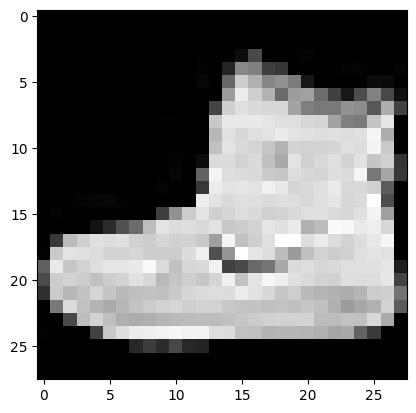

In [ ]:
plt.imshow(image.squeeze(),cmap="gray")



In [ ]:
rand_image_tensor = torch.randn(size=(1,28,28))
# rand_image_tensor.shape
rand_image_tensor.to(device)

tensor([[[ 1.7878e+00, -4.7805e-01, -2.4286e-01, -9.3416e-01, -2.4826e-01,
          -1.2082e+00, -4.7767e-01,  5.2013e-01, -1.5673e+00, -2.3945e-01,
           2.3228e+00, -9.6337e-01,  2.0024e+00,  4.6643e-01,  1.5730e+00,
          -9.2283e-01,  3.5586e-01, -6.8662e-01, -4.9336e-01,  2.4149e-01,
          -1.1109e+00,  9.1546e-02, -2.3169e+00, -2.1680e-01, -3.0973e-01,
          -3.9571e-01,  8.0341e-01, -6.2160e-01],
         [-5.9200e-01, -6.3074e-02, -8.2855e-01,  3.3090e-01,  3.4912e-02,
           3.2110e-01,  1.5736e+00, -8.4547e-01,  1.3123e+00,  6.8716e-01,
          -1.0892e+00, -3.5529e-01, -1.4181e+00,  8.9627e-01,  4.9905e-02,
           2.2667e+00,  1.1790e+00, -4.3445e-01, -1.3864e+00, -1.2862e+00,
          -8.3712e-01, -9.2239e-01,  1.8113e+00,  1.6056e-01,  3.6725e-01,
           1.7541e-01,  1.3852e+00, -4.4585e-01],
         [-1.2024e+00,  7.0781e-01, -1.0759e+00,  5.3565e-01,  1.1754e+00,
           5.6117e-01, -4.5275e-01, -7.7178e-01,  1.4534e-01,  2.3105e-01,


In [ ]:
#Pass image through model
model_2(rand_image_tensor.unsqueeze(0).to(device))

tensor([[ 0.0424, -0.0839,  0.0839, -0.0463,  0.0053,  0.0437,  0.0025,  0.0108,
         -0.0158, -0.0177]], grad_fn=<AddmmBackward0>)

##Training the CNN


## Set up loss fn and optimzer for model_2

In [ ]:
from helper_functionss import accuracy_fn
loss_fn=nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),lr=0.1)


In [ ]:
model_2.state_dict()

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[ 0.2548,  0.2767, -0.0781],
                        [ 0.3062, -0.0730,  0.0673],
                        [-0.1623,  0.1958,  0.2938]]],
              
              
                      [[[-0.2445,  0.2897,  0.0624],
                        [ 0.2463,  0.0451,  0.1607],
                        [-0.0471,  0.2570,  0.0493]]],
              
              
                      [[[-0.1556,  0.0850, -0.1536],
                        [-0.0391, -0.1354,  0.2211],
                        [-0.2631, -0.1537, -0.0941]]],
              
              
                      [[[-0.2004,  0.0315, -0.3292],
                        [ 0.3010, -0.2832,  0.2573],
                        [ 0.0555, -0.1082,  0.2060]]],
              
              
                      [[[ 0.0520,  0.2693,  0.0364],
                        [-0.1051,  0.0896, -0.0904],
                        [ 0.1403,  0.2976,  0.1927]]],
              
              
      

In [ ]:
## Training and testing CNN model using training and testing functions
torch.manual_seed(42)
# torch.cuda.manual_seed(42)
from timeit import default_timer as timer
start_train_timer=timer()
#train and test the model
epochs=3
for epoch in tqdm(range(epochs)):
  print(f"----------------Epoch: {epoch}\n------------------")
  train_step(model=model_2,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy,
             device=device)
  
  test_step(model=model_2,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
             accuracy_fn=accuracy,
            device=device)
  

end_train_timer=timer()

total_train_time=print_train_time(start=start_train_timer,end=end_train_timer,device=device)




  0%|          | 0/3 [00:00<?, ?it/s]

----------------Epoch: 0
------------------
Train loss: 0.59518 | Train acc: 78.38 %
Test Loss: 0.39500 | Test_acc: 85.99 %

----------------Epoch: 1
------------------
Train loss: 0.36536 | Train acc: 86.90 %
Test Loss: 0.35244 | Test_acc: 86.91 %

----------------Epoch: 2
------------------
Train loss: 0.32588 | Train acc: 88.13 %
Test Loss: 0.32719 | Test_acc: 88.07 %

Train time on cpu:  191.635 seconds


In [ ]:
#get model_2 results
model_2_results = eval_model(model=model_2,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy=accuracy,
                             device=device)
model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name ': 'FashionMNISTmodelV2',
 'model_loss': 0.32718968391418457,
 'model_acc': 88.06908945686901}

###Compare model results and training time

In [ ]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results,model_1_results,model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMnistmodelV1,0.685001,75.019968
2,FashionMNISTmodelV2,0.327190,88.069089


In [ ]:
compare_results["training_time"]=[total_train_time_model_0,
                                  total_train_time_model_1,
                                  total_train_time]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.476639,83.426518,41.652335
1,FashionMnistmodelV1,0.685001,75.019968,42.167986
2,FashionMNISTmodelV2,0.327190,88.069089,191.635456


Text(0, 0.5, 'model')

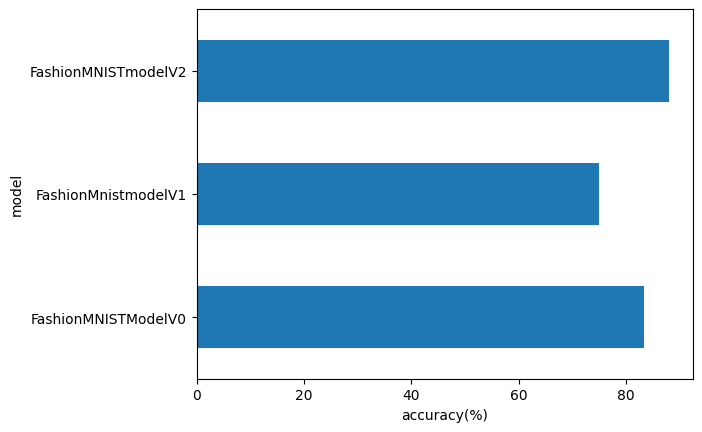

In [ ]:
# Visualize model results
compare_results.set_index("model_name ")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy(%)")
plt.ylabel("model")

In [ ]:
!nvidia-smi

/bin/bash: nvidia-smi: command not found


##Make and evaluate random predictions with best model

In [ ]:
def make_predictions(model: torch.nn.Module,
                     data: list, 
                     device: torch.device=device):
   pred_probs = []
   model.to(device)
   model.eval()
   with torch.inference_mode():
     for sample in data:
       # Prepare the sample (add a batch dimension and pass to target device)
       sample = torch.unsqueeze(sample, dim=0).to(device)

       # Forward pass (model outputs raw logits)
       pred_logit = model(sample)

       #get pred probability
       pred_prob=torch.softmax(pred_logit.squeeze(),dim=0)

      #pred prob into pred labels
       
      #pred_probs off the gpu
       pred_probs.append(pred_prob.cpu())
   # stack the pred_probs to turn list into a tensor
   return torch.stack(pred_probs) 



In [ ]:
img, label = test_data[0][:10]
img.shape , label

(torch.Size([1, 28, 28]), 9)

In [ ]:
import random
# random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

test_samples[0].shape



torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Shirt')

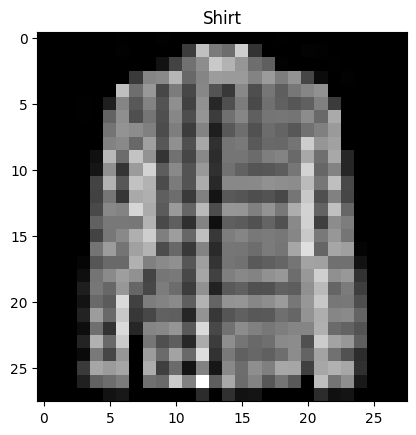

In [ ]:
plt.imshow(test_samples[0].squeeze(), cmap="gray")
plt.title(class_names[test_labels[0]])

In [ ]:
#make predictions
pred_probs=make_predictions(model=model_2,data=test_samples)
pred_probs[:10]


tensor([[2.7691e-03, 3.5441e-04, 9.3396e-03, 1.9274e-04, 5.8188e-02, 1.8429e-05,
         9.2749e-01, 2.5522e-06, 1.6271e-03, 1.5267e-05],
        [1.1245e-02, 1.0743e-05, 9.1149e-01, 9.9126e-03, 9.3433e-03, 1.0798e-03,
         4.0396e-02, 4.3631e-06, 1.6507e-02, 7.3782e-06],
        [1.0128e-06, 3.2157e-07, 2.4571e-06, 2.7920e-05, 1.0112e-06, 9.9720e-01,
         1.5604e-06, 1.2952e-03, 5.0994e-05, 1.4180e-03],
        [2.2999e-06, 2.0151e-07, 2.6611e-06, 4.1314e-06, 4.3163e-06, 1.3663e-04,
         2.5491e-06, 1.2950e-02, 7.4578e-04, 9.8615e-01],
        [6.8192e-04, 4.9738e-05, 1.1975e-03, 5.3152e-03, 2.3798e-03, 2.7208e-04,
         2.1849e-02, 2.9063e-04, 9.6780e-01, 1.6331e-04],
        [1.6261e-05, 9.9977e-01, 1.4035e-07, 2.0086e-04, 1.1417e-05, 3.5843e-07,
         3.8571e-06, 4.9749e-07, 7.9077e-07, 2.4626e-07],
        [8.8057e-06, 4.0507e-06, 4.6219e-05, 2.2107e-04, 1.0243e-05, 2.6360e-02,
         2.4185e-06, 9.0265e-01, 2.2768e-03, 6.8422e-02],
        [1.1613e-02, 6.4807

In [ ]:
#convert pred_prob to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes


tensor([6, 2, 5, 9, 8, 1, 7, 6, 9])

In [ ]:
test_labels

[6, 2, 5, 9, 8, 1, 7, 6, 9]

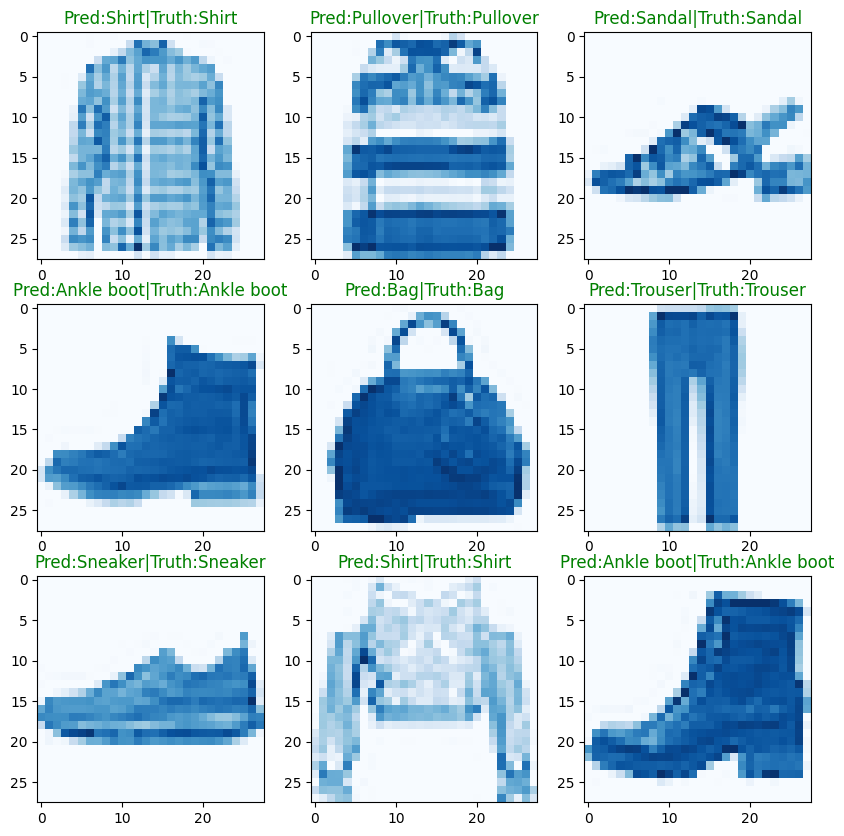

In [ ]:
#Plot predictions
plt.figure(figsize=(10,10))
nrows=3
ncols=3
for i , samples in enumerate(test_samples):

   plt.subplot(nrows,ncols,i+1)
   plt.imshow(samples.squeeze(),cmap="Blues")
   title_text=f"Pred:{class_names[pred_classes[i]]}|Truth:{class_names[test_labels[i]]}"
   if(pred_classes[i]==test_labels[i]):
      plt.title(title_text,c='g')

   else:
      plt.title(title_text,c='y')


In [ ]:
# Make predictions on the entire dataset.
from tqdm.auto import tqdm
y_preds=[]

model_2.eval()
with torch.inference_mode():
  for X,y in tqdm(test_dataloader,desc="Making Predictions"):
     X,y=X.to(device),y.to(device)
      #forward pass
     y_logits=model_2(X)

     y_pred=torch.softmax(y_logits.squeeze(),dim=0).argmax(dim=1)
     y_preds.append(y_pred.cpu())
# print(y_preds)
y_pred_tensor=torch.cat(y_preds)
y_pred_tensor[:10]



Making Predictions:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [ ]:
len(y_pred_tensor)

10000

In [ ]:
try:
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")
  assert int(mlxtend.__version__.split(".")[1]>=19,"mlxtend version should be 0.19.0 or higher")
except:
  !pip install -q torchmetrics -U mlxtend
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 31.5 MB/s eta 0:00:00
mlxtend version: 0.22.0


In [ ]:
!pip install -q torchmetrics -U mlxtend
import torchmetrics, mlxtend
print(f"mlxtend version: {mlxtend.__version__}")

mlxtend version: 0.22.0


In [ ]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
y_pred_tensor[:10]

tensor([9, 2, 1,  ..., 8, 1, 8])

In [ ]:
test_data.targets

tensor([9, 2, 1,  ..., 8, 1, 5])

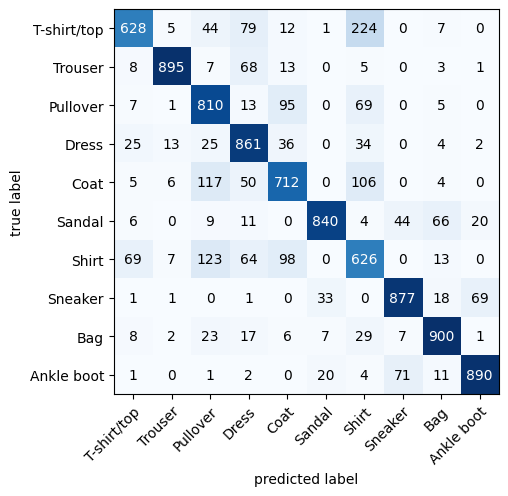

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat=ConfusionMatrix(task="multiclass",num_classes=len(class_names))
confmat_tensor = confmat(preds=y_pred_tensor,target=test_data.targets)

#plot confusion matrix.
fig, ax = plot_confusion_matrix(
        conf_mat=confmat_tensor.numpy(),
        class_names=class_names,figsize=(9,5))




In [ ]:
confmat_tensor

tensor([[628,   5,  44,  79,  12,   1, 224,   0,   7,   0],
        [  8, 895,   7,  68,  13,   0,   5,   0,   3,   1],
        [  7,   1, 810,  13,  95,   0,  69,   0,   5,   0],
        [ 25,  13,  25, 861,  36,   0,  34,   0,   4,   2],
        [  5,   6, 117,  50, 712,   0, 106,   0,   4,   0],
        [  6,   0,   9,  11,   0, 840,   4,  44,  66,  20],
        [ 69,   7, 123,  64,  98,   0, 626,   0,  13,   0],
        [  1,   1,   0,   1,   0,  33,   0, 877,  18,  69],
        [  8,   2,  23,  17,   6,   7,  29,   7, 900,   1],
        [  1,   0,   1,   2,   0,  20,   4,  71,  11, 890]])

##Save and load best performing model

In [ ]:
from pathlib import Path
Model_Path=Path("Models")
Model_Path.mkdir(parents=True,exist_ok=True)
Model_name="03_PyTorch_Computer_vision_model_2.pth"
Model_save_path=Model_Path / Model_name

print(f"Saving model to:{Model_save_path}")
torch.save(obj=model_2.state_dict(),f=Model_save_path)



Saving model to:Models/03_PyTorch_Computer_vision_model_2.pth


In [ ]:
# Create a new instance
torch.manual_seed(42)

loaded_model_2=FashionMNISTmodelV2(input_shape=1,hidden_units=10,output_shape=len(class_names))
loaded_model_2.load_state_dict(torch.load(f=Model_save_path))
loaded_model_2.to(device)

FashionMNISTmodelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
model_2_results

{'model_name ': 'FashionMNISTmodelV2',
 'model_loss': 0.32718968391418457,
 'model_acc': 88.06908945686901}

In [ ]:
torch.manual_seed(42)
loaded_model_2_results=eval_model(
    model=loaded_model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy=accuracy
)
loaded_model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name ': 'FashionMNISTmodelV2',
 'model_loss': 0.32718968391418457,
 'model_acc': 88.06908945686901}

In [ ]:
torch.isclose(torch.tensor(model_2_results["model_loss"]),
              torch.tensor(loaded_model_2_results["model_loss"]),
              atol=1e-08)

tensor(True)